In [ ]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix
     

In [ ]:
files.upload()

Saving kaggle (10).json to kaggle (10).json


{'kaggle (10).json': b'{"username":"snehalathakumar","key":"e0757f2fe5a78f2033c2a7c42a76bf59"}'}

In [ ]:
kaggle_data={"username":"snehalathakumar","key":"e0757f2fe5a78f2033c2a7c42a76bf59"}
os.environ['KAGGLE_USERNAME']=kaggle_data["username"]
os.environ['KAGGLE_KEY']=kaggle_data["key"]

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:

!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

100% 207M/207M [00:13<00:00, 16.8MB/s]
100% 207M/207M [00:13<00:00, 15.9MB/s]


In [ ]:
!unzip \*.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
for dirpath,dirnames,filenames in os.walk("/content/New Masks Dataset"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/New Masks Dataset'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Train'.
there are 0 directories and 300 images in '/content/New Masks Dataset/Train/Non Mask'.
there are 0 directories and 300 images in '/content/New Masks Dataset/Train/Mask'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Validation'.
there are 0 directories and 153 images in '/content/New Masks Dataset/Validation/Non Mask'.
there are 0 directories and 153 images in '/content/New Masks Dataset/Validation/Mask'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Test'.
there are 0 directories and 50 images in '/content/New Masks Dataset/Test/Non Mask'.
there are 0 directories and 50 images in '/content/New Masks Dataset/Test/Mask'.


In [ ]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['111.jpg']
image shape (428, 320, 3)


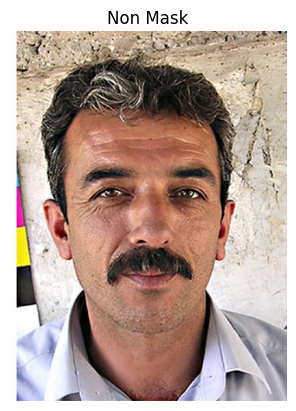

In [ ]:

img = view_image("/content/New Masks Dataset/Train/","Non Mask")
     

['0547.jpg']
image shape (1349, 1080, 3)


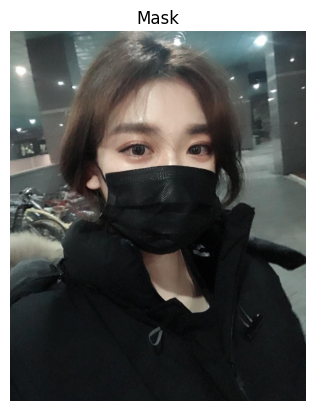

In [ ]:

img = view_image("/content/New Masks Dataset/Train/","Mask")

In [ ]:
data=[]
labels=[]
no_mask=os.listdir("/content/New Masks Dataset/Train/Non Mask/")
for a in no_mask:

    image = cv2.imread("/content/New Masks Dataset/Train/Non Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

no_mask=os.listdir("/content/New Masks Dataset/Test/Non Mask/")
for a in no_mask:

    image = cv2.imread("/content/New Masks Dataset/Test/Non Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)
     

In [ ]:

mask=os.listdir("/content/New Masks Dataset/Train/Mask/")
for a in mask:

    image = cv2.imread("/content/New Masks Dataset/Train/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)


mask=os.listdir("/content/New Masks Dataset/Test/Mask/")
for a in mask:

    image = cv2.imread("/content/New Masks Dataset/Test/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)

In [ ]:
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
data.shape

(700, 224, 224, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42,shuffle=True,
                                                    stratify = labels)
     


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


base_model.trainable = False

# for layer in base_model.layers[30:]:
#   layer.trainable = False
    

model = Flatten()(base_model.output)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=64, activation="relu")(model)
prediction_layer = Dense(units=1, activation="sigmoid")(model)

model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
vgg16_history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, batch_size=32)



58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/20
18/18 [==============================] - 24s 611ms/step - loss: 0.7109 - accuracy: 0.5203 - val_loss: 0.4599 - val_accuracy: 0.8571
Epoch 2/20
18/18 [==============================] - 2s 138ms/step - loss: 0.5231 - accuracy: 0.7513 - val_loss: 0.3500 - val_accuracy: 0.8730
Epoch 3/20
18/18 [==============================] - 2s 135ms/step - loss: 0.3682 - accuracy: 0.8131 - val_loss: 0.3319 - val_accuracy: 0.8571
Epoch 4/20
18/18 [==============================] - 2s 139ms/step - loss: 0.4209 - accuracy: 0.8095 - val_loss: 0.3413 - val_accuracy: 0.8254
Epoch 5/20
18/18 [==============================] - 2s 139ms/step - loss: 0.3780 - accuracy: 0.8519 - val_loss: 0.3170 - val_accuracy: 0.9524
Epoch 6/20
18/18 [==============================] - 3s 140ms/step - loss: 0.2473 - accuracy: 0.9101 - val_loss: 0.1709 - val_accuracy: 0.9524
Epoch 7/20
18/18 [==============================] - 2s 136ms/step - loss: 0.1898 -

In [ ]:
accuracy1 = model.evaluate(X_test,y_test)

3/3 [==============================] - 1s 627ms/step - loss: 0.0719 - accuracy: 0.9714


In [ ]:
predictions = model.predict(X_test)

predict1=[]

for i in range(len(predictions)):
    if predictions[i][0]>0.5:
        predict1.append(1)
    else:
        predict1.append(0)

3/3 [==============================] - 0s 112ms/step


In [ ]:
pd.DataFrame(confusion_matrix(y_test, predict1), columns= ["No Mask", "Mask"], index = ["No Mask", "Mask"])

,No Mask,Mask
No Mask,34,1
Mask,1,34


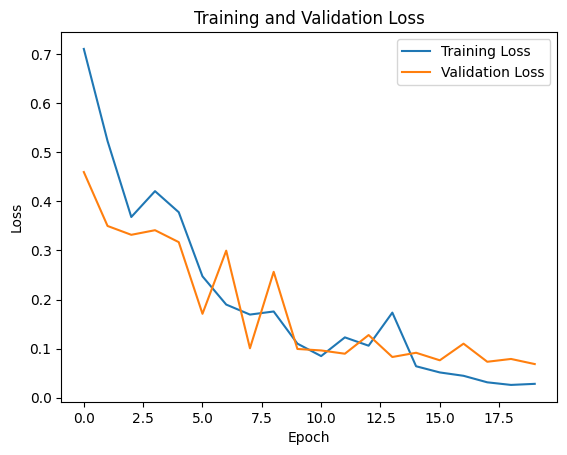

In [ ]:
plt.plot(vgg16_history.history['loss'], label='Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

base_model.trainable = False

# for layer in base_model.layers[30:]:
#   layer.trainable = False
    

model = Flatten()(base_model.output)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=64, activation="relu")(model)
prediction_layer = Dense(units=1, activation="sigmoid")(model)

model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
import matplotlib.pyplot as plt

# Train the model and save the history object
mobilenet_history = model.fit(X_train, y_train, epochs=15, validation_split=0.1, batch_size=32)







Epoch 1/15
18/18 [==============================] - 5s 142ms/step - loss: 0.7430 - accuracy: 0.8254 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 2/15
18/18 [==============================] - 1s 50ms/step - loss: 0.0195 - accuracy: 0.9965 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 3/15
18/18 [==============================] - 1s 45ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 4/15
18/18 [==============================] - 1s 44ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 5/15
18/18 [==============================] - 1s 48ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/15
18/18 [==============================] - 1s 45ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7/15
18/18 [==============================] - 1s 49ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 8/15
1

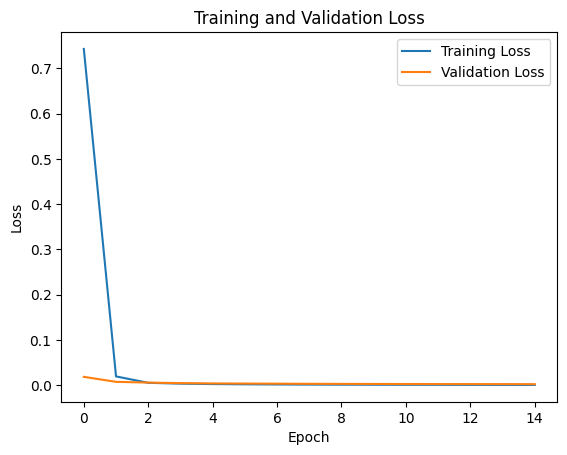

In [ ]:
plt.plot(mobilenet_history.history['loss'], label='Training Loss')
plt.plot(mobilenet_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
accuracy = model.evaluate(X_test,y_test)[1]

print(f"The accuracy of model is {accuracy * 100:.2f}%")

3/3 [==============================] - 0s 169ms/step - loss: 6.2630e-04 - accuracy: 1.0000
The accuracy of model is 100.00%


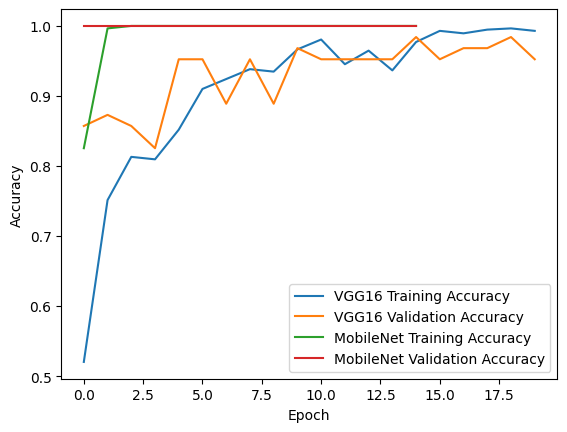

In [ ]:
# Plot the training and validation accuracy of the models
plt.plot(vgg16_history.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.plot(mobilenet_history.history['accuracy'], label='MobileNet Training Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNet Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)

predict=[]

for i in range(len(predictions)):
    if predictions[i][0]>0.5:
        predict.append(1)
    else:
        predict.append(0)

3/3 [==============================] - 0s 30ms/step


In [ ]:

pd.DataFrame(confusion_matrix(y_test, predict), columns= ["No Mask", "Mask"], index = ["No Mask", "Mask"])

,No Mask,Mask
No Mask,35,0
Mask,0,35


In [ ]:
model_name = "/content/mask_detection_best.h5"
tf.keras.models.save_model(model, model_name)